Ramas, Ron Patrick G. - 23102078

# **Assignment in Data Analytics**

---

### **Horizontal Stacked Bar Plot**

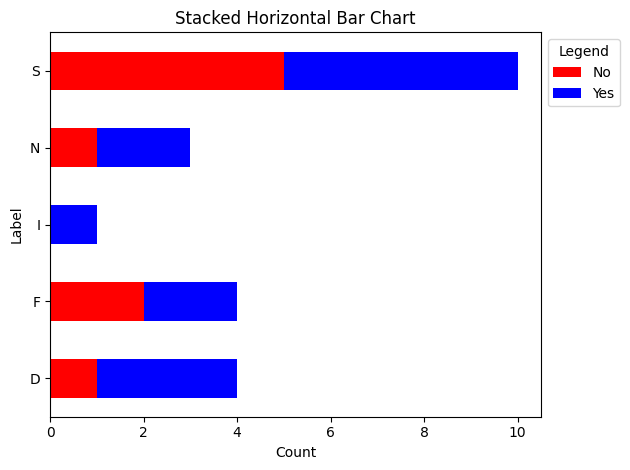

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("res/bar_assignment.csv")
data.columns = data.columns.str.strip()

data["COUNT"] = data["COUNT"].map({1: "Yes", 0: "No"})

plot_data = data.groupby(["LABEL", "COUNT"]).size().unstack(fill_value=0)

plot_data.plot(kind="barh", stacked=True, color=["red", "blue"])
plt.xlabel("Count")
plt.ylabel("Label")
plt.title("Stacked Horizontal Bar Chart")
plt.legend(title="Legend", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


## **Sankey Plot**

---

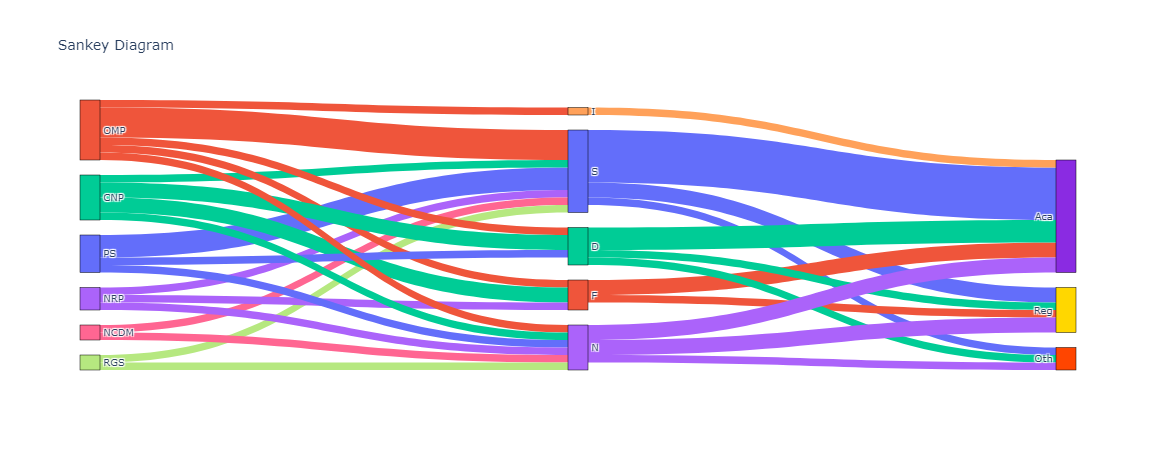

In [ ]:
import plotly.graph_objects as go

labels = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS', 
          'S', 'F', 'D', 'N', 'I', 'Reg', 'Aca', 'Oth']

colors = [    '#FFA07A', '#20B2AA', '#FF8C00', '#FF6AB4', '#8FBC8F', 
    '#02CED1', '#FFD701', '#BA55D3', '#87CEFA', '#4782B4',
    '#5F9EA0', '#6395EC', '#00BFFF', '#3CB371', '#97FB98', 
    '#90EE8F' ]

sources = [0, 1, 2, 3, 4, 5, 6, 7,
           0, 1, 2, 3, 4, 5, 6, 7,  
           0, 1, 2, 3, 4, 5, 6, 7,  
           0, 1, 2, 3, 4, 5, 6, 7,  
           0, 1, 2, 3, 4, 5, 6, 7]  

targets = [8, 8, 8, 8, 8, 8, 8, 8,
           9, 9, 9, 9, 9, 9, 9, 9,
           10, 10, 10, 10, 10, 10, 10, 10,
           11, 11, 11, 11, 11, 11, 11, 11,
           12, 12, 12, 12, 12, 12, 12, 12]

values = [3, 4, 1, 1, 0, 0, 1, 1,
          0, 1, 2, 1, 0, 0, 0, 0,
          1, 1, 2, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 0, 0, 1, 1,
          0, 1, 0, 0, 0, 0, 0, 0]

sources += [8, 8, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11, 12, 12, 12]
targets += [13, 14, 15, 13, 14, 15, 13, 14, 15, 13, 14, 15, 13, 14, 15]
values += [2, 7, 1, 1, 2, 0, 1, 3, 1, 2, 2, 1, 0, 1, 0]

link_colors = [colors[src] for src in sources]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
))

fig.update_layout(title_text="Sankey Diagram", font_size=10)

from IPython.display import display
from PIL import Image

img = Image.open("../assets/newplot.png")
display(img)